In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm 

'''读取数据集'''

data1 = loadmat('./data/ex5data1.mat')
data2 = loadmat('./data/ex5data2.mat')
data3 = loadmat('./data/ex5data3.mat')
x1 = data1['X']
y1 = data1['y'].flatten()
x2 = data2['X']
y2 = data2['y'].flatten()
x3 = data3['X']
y3 = data3['y'].flatten()
xval = data3['Xval']
yval = data3['yval'].flatten()


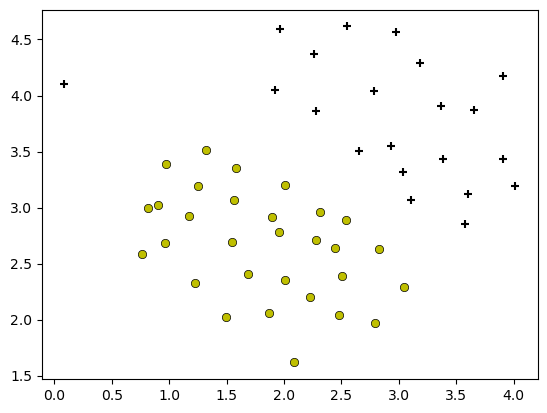

In [2]:

'''============================part1========================='''
'''可视化数据集'''
def plot_data(x, y):
    p = x[y==1]
    n = x[y==0]
    plt.scatter(p[:,0], p[:,1], c='k', marker='+')
    plt.scatter(n[:,0], n[:,1], c='y', marker='o', edgecolors='k', linewidths=0.5)
    plt.show
  
plot_data(x1, y1)


In [3]:
# 创建一个对象clf1用于svm.SVC实例化；。设定正则化惩罚参数C=1，核函数的选择为linear，注意kernal默认为高斯核函数
# 使用x1和y1训练模型
'''

code here

'''
clf1.predict([[2.0, 4.5]])


array([1], dtype=uint8)

In [4]:
clf1

SVC(C=100, kernel='linear')

<function matplotlib.pyplot.show(close=None, block=None)>

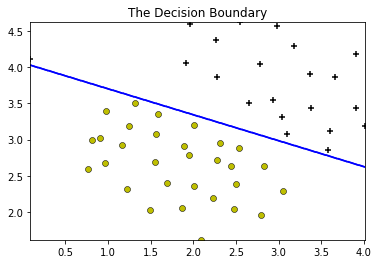

In [5]:
'''画出决策边界'''
def plot_boundary(clf, x1):
    u = np.linspace(np.min(x1[:,0]), np.max(x1[:,0]), 500) #为了后面可以直接调用这个函数
    v = np.linspace(np.min(x1[:,1]), np.max(x1[:,1]), 500)
    x, y = np.meshgrid(u, v) #转为网格（500*500）
    z = clf.predict(np.c_[x.flatten(), y.flatten()]) #因为predict中是要输入一个二维的数据，因此需要展开
    z = z.reshape(x.shape) #重新转为网格
    plt.contour(x, y, z, 1, colors='b') #画等高线
    plt.title('The Decision Boundary')
    plt.show
   
#画图   
plt.figure(1)
plot_data(x1, y1)
plot_boundary(clf1, x1)
plt.show


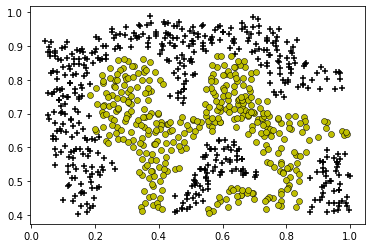

In [6]:
'''============================part2========================='''
'''高斯核函数模型-样本2'''
#可视化训练集
plot_data(x2, y2) 

In [7]:
# 定义高斯核函数
def gaussianKernel(x1, x2, sigma):
    '''
    
    code here
    
    '''
    
a1 = np.array([1, 2, 1])    
a2 = np.array([0, 4, -1])  
sigma = 2
gaussianKernel(a1, a2, sigma) #检查是否为0.32465246735834974



0.32465246735834974

<function matplotlib.pyplot.show(close=None, block=None)>

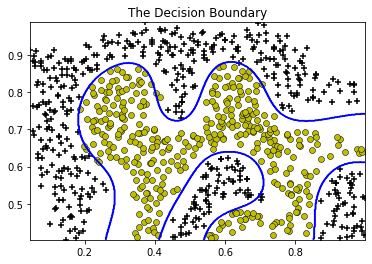

In [8]:
#创建对象clf2用于实例化svm.SVC(),传入参数C=1，核函数选用高斯核函数“rbf”，传入合适的gamma值使其等效于sigma=0.1
'''

code here

'''
clf2.fit(x2, y2)

#画图   
plt.figure(2)
plot_data(x2, y2)
plot_boundary(clf2, x2)
plt.show

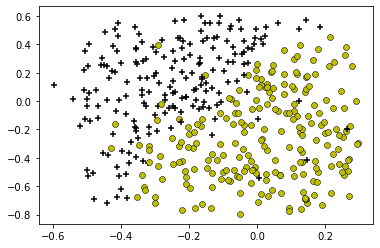

In [9]:
'''============================part3========================='''
'''高斯核函数模型-样本3'''
#可视化训练集
plot_data(x3, y3) 
plot_data(xval, yval) 

In [10]:
try_value = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
#错误率
def error_rate(predict_y, yval):
    m = yval.size
    count = 0
    for i in range(m):
        count = count + np.abs(int(predict_y[i])-int(yval[i])) #避免溢出错误得到225
    return float(count/m)    

#模型选择
def model_selection(try_value, x3, y3, xval, yval):
    '''
    
    code here
    
    '''
    return c, sigma, error

c, sigma, error = model_selection(try_value, x3, y3, xval, yval) #(1.0, 0.1, 0.035)  
print(c, sigma, error)

1.0 0.1 0.035


<function matplotlib.pyplot.show(close=None, block=None)>

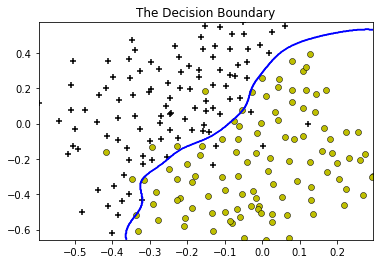

In [11]:
clf3 = svm.SVC(C=c, kernel='rbf', gamma=np.power(sigma, -2)/2)
clf3.fit(x3, y3)

#画图   
plt.figure(3)
plot_data(x3, y3)
plot_boundary(clf3, x3)
plt.show